# Linear Regression
Linear regression is a model of the form $p(y|w^T\textbf{x})=\mathcal{N}(y|w^T\textbf{x}, \sigma^2)$, where *w* is the coefficient that can be used to predict a new datapoint $X_i\in \textbf{X}$: $Y_i = X_i^Tw$. We can use **least square estimation** to evaluate the best *w*. Define least square error to be:
$$l(\textbf{X})=\frac{1}{2}|y-\textbf{X}w|^2_2 = \frac{1}{2}(y-\textbf{X}w)^T(y-\textbf{X}w).$$
Setting the gradient of $l(\textbf{X})$ with respect to $w$, we get $$\frac{\partial l(\textbf{X})}{\partial w}=\textbf{X}^T\textbf{X}w-\textbf{X}^Ty=0.$$
Then we can solve for *w* and this is called its **ordinary least square (OLS)** solution:
$$\hat w=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^Ty.$$

## Ridge Regression
Sometimes $(\textbf{X}^T\textbf{X})^{-1}$ is singular and does not have an inverse; in this case we need to add an additional matrix $\alpha \textbf{I}$ to $\textbf{X}^T\textbf{X}$ so that its non-singular. Then the coefficient can be calculated as:
$$\hat w=(\textbf{X}^T\textbf{X}+\alpha \textbf{I})^{-1}\textbf{X}^Ty.$$
Ridge regression minimizes the biased square error, with a penalty term $\alpha|w|^2_2$:
$$l(\textbf{X})=\frac{1}{2}(|y-\textbf{X}w|^2_2+\alpha|w|^2_2).$$
The constraint for ridge regresesion is $|w|^2<\lambda$. We can use $\alpha$ to impose a maximum value on the magnitude of *w*. When $\alpha$ is large, the bias term dominates, and *w* gets closer to 0. The relationship of *w* and $\alpha$ can be shown as follows:

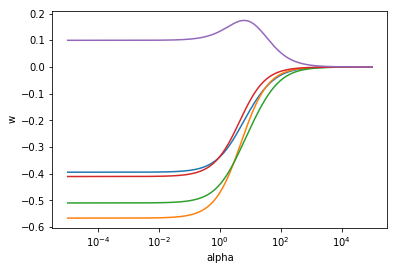

In [23]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randn(10, 5)
Y = np.random.randn(10)
alphas = np.logspace(-5, 5, 200)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('w')
plt.show()

In `Ridge.py`, implement ridge regressor. We can insert an "intercept" column of 1s at the front of input $\textbf{X}$ so that the computed $w$ using OLS solution contains intercept vector as its first column. This can be done by the following line of code:
```
X = np.column_stack([np.ones(len(X)), X])
```

Use the following test case to test your code:

In [18]:
from Ridge import *

X = np.array([[1], [2], [3], [4], [5]])
Y = np.array([1, 2, 3, 4, 5])
model = Ridge(alpha=0.0)
model.fit(X, Y)
print(model.w)

[  2.66453526e-15   1.00000000e+00]


When $\alpha=0$, the penalty term is negligible and the linear model is $y=x$. Verify it by printing out $w$. Note that first term is intercept and second term is slope. Finally, we can use sklearn module to solve ridge regressor:

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# load diabetes dataset
def load_diabetes():
    data, target = datasets.load_diabetes(return_X_y=True)
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2)
    return x_train, y_train, x_test, y_test

train_x, train_y, test_x, test_y = load_diabetes()
model = Ridge()
model.fit(train_x, train_y)
score = model.score(test_x, test_y)
print(score)

0.483488220573
